

# Data Dictionary
We assume that the data shows the matured travel insurance plans issued by Singapore agencies. We also set the definition of each of the columns as below. 

|Columns|Description|
|-|-|
|Agency| Name of agency |
|Agency Type|Type of travel insurance agencies|
|Distribution Channel|Distribution channel of travel insurance agencies|
|Product Name|Name of the travel insurance products|
|Claim|Claim Status|
|Duration|Duration of travel|
|Destination|Destination of travel|
|Net Sales|Amount of sales of travel insurance policies (in SGD)|
|Commision (in value)|Commission received for travel insurance agency (in SGD)|
|Gender|Gender of insured|
|Age|Age of insured|

# Exploratory Data Analysis
We will use 10 charts to demonstrate the underlying patterns of the data set.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_excel(
    "[MASA Hackathon 2022] Stage 2 Travel Insurance Data Set.xlsx")


In [ ]:
df.head()


,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claims Amount
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81,6515
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71,5532
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32,45378
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32,40600
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41,55360


In [ ]:
df.describe()


,Duration,Net Sales,Commision (in value),Age,Claims Amount
count,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981,83102.837997
std,101.791566,48.845637,19.804388,14.017010,82368.196249
min,-2.000000,-389.000000,0.000000,0.000000,753.000000
25%,9.000000,18.000000,0.000000,35.000000,21510.500000
50%,22.000000,26.530000,0.000000,36.000000,70651.000000
75%,53.000000,48.000000,11.550000,43.000000,115715.500000
max,4881.000000,810.000000,283.500000,118.000000,825039.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
 11  Claims Amount         63326 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 5.8+ MB


In [ ]:
df.nunique()


Agency                     16
Agency Type                 2
Distribution Channel        2
Product Name               26
Claim                       2
Duration                  455
Destination               149
Net Sales                1139
Commision (in value)     1035
Gender                      2
Age                        89
Claims Amount           50118
dtype: int64

In [ ]:
df2 = df.rename({'Agency Type': 'Agency_Type', 'Distribution Channel': 'Distribution_Channel',
                 'Product Name': 'Product', 'Net Sales': 'Net_Sales', 'Commision (in value)': 'Commission', 'Claims Amount': 'Claims_Amount'}, axis=1)


In [ ]:
pd.options.display.max_rows = 1000
df2.groupby("Destination")["Claims_Amount"].mean().sort_values()


Destination
ANGOLA                                          2214.000000
IRAN, ISLAMIC REPUBLIC OF                       5321.333333
GUINEA                                          6861.250000
MALI                                            7483.500000
NEW CALEDONIA                                  13246.000000
BHUTAN                                         15685.750000
BRUNEI DARUSSALAM                              18353.511538
REUNION                                        28163.000000
SOUTH AFRICA                                   32933.858025
MOROCCO                                        34157.800000
TIBET                                          35335.000000
NORTHERN MARIANA ISLANDS                       38119.000000
SINGAPORE                                      39223.687212
MAURITIUS                                      39346.818182
NAMIBIA                                        41401.000000
KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF         44029.000000
TUNISIA                     

Text(0.5, 1, 'Pairwise Scatterplots of Numeric Variables')

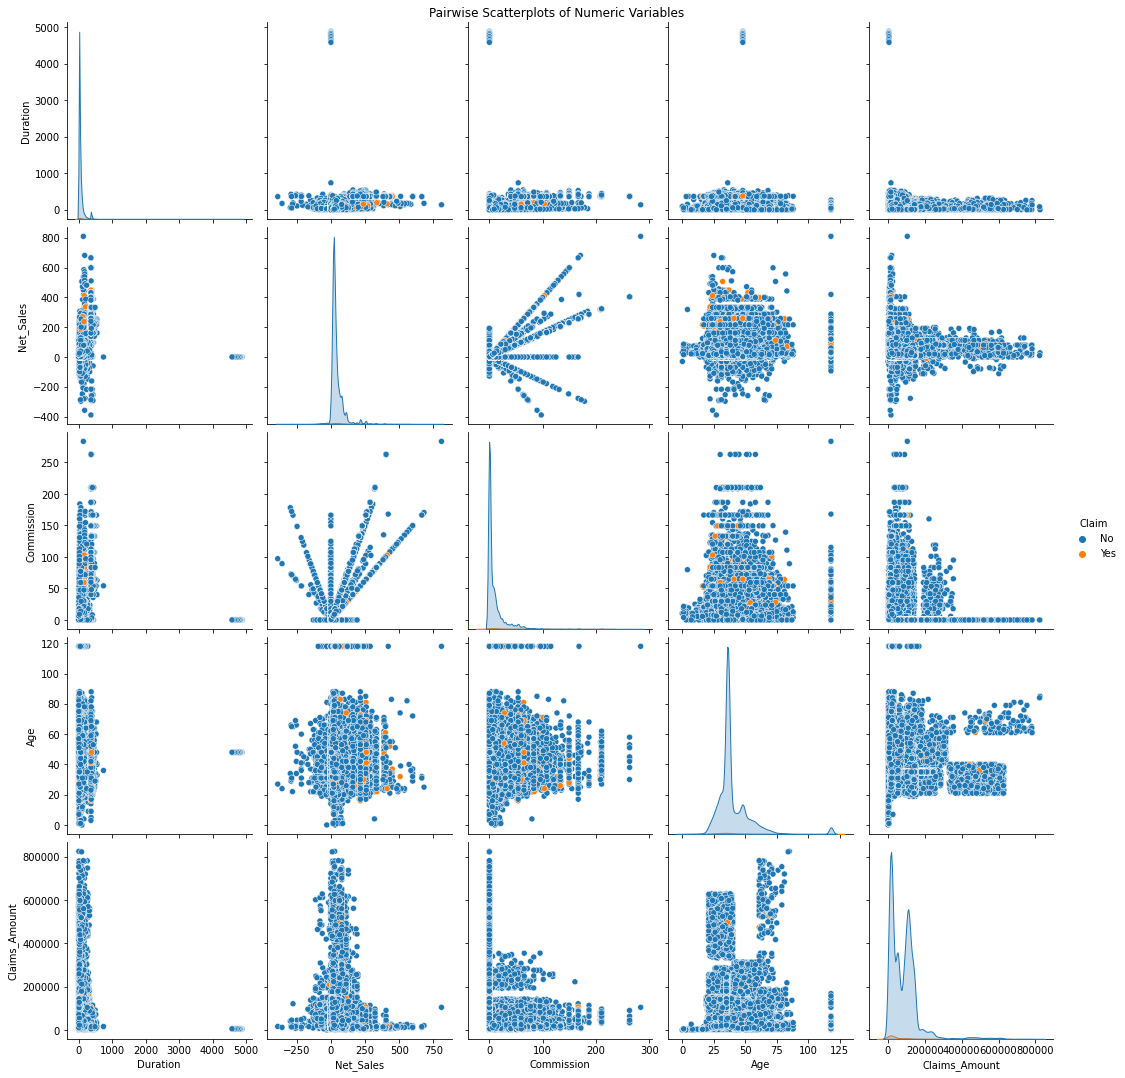

In [ ]:
sns.pairplot(df2, height=3, hue="Claim").fig.suptitle(
    "Pairwise Scatterplots of Numeric Variables", y=1)


Text(0.5, 1.0, 'Correlation Heatmap of Numeric Variables')

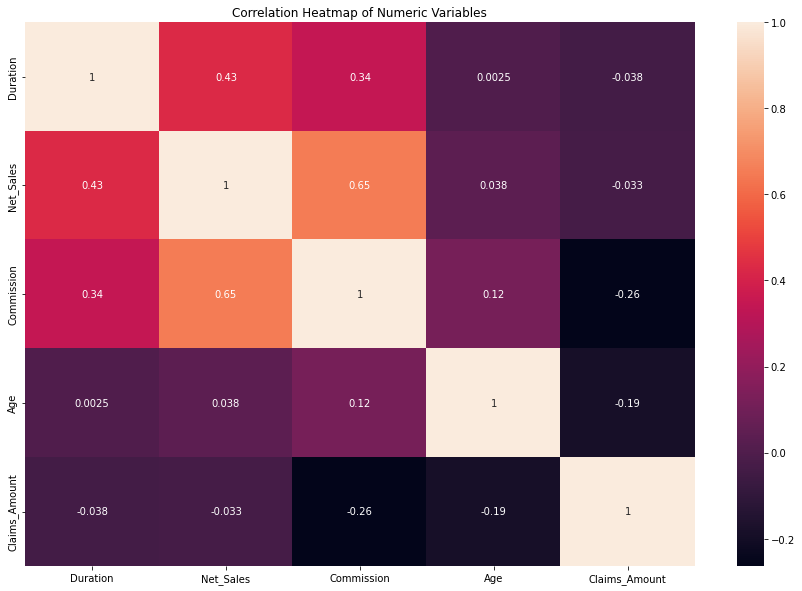

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df2.corr(), annot=True).set_title(
    "Correlation Heatmap of Numeric Variables")


## Claim Rate
- We want to see how claim rate is related to some variables 

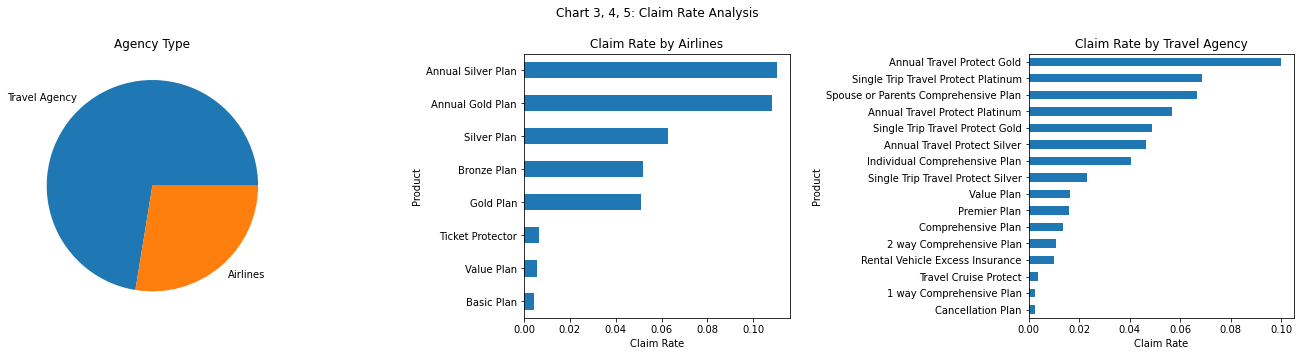

In [ ]:
df3 = df2.groupby(['Agency_Type', 'Product'])['Claim'].value_counts(
    normalize=True).to_frame(name='Claim_Rate').reset_index()

fig, axes = plt.subplots(nrows=1, ncols=3)
plt.suptitle('Chart 3, 4, 5: Claim Rate Analysis')
df2.Agency_Type.value_counts(normalize=True).plot(
    kind="pie", title="Agency Type", ylabel="", ax=axes[0], figsize=(18, 5))
df3[(df3["Claim"] == "Yes") & (df3["Agency_Type"] == "Airlines")].sort_values(by=['Claim_Rate']).plot(
    kind="barh", x="Product", y="Claim_Rate", legend=False, title="Claim Rate by Airlines", ax=axes[1])
axes[1].set_xlabel("Claim Rate")
df3[(df3["Claim"] == "Yes") & (df3["Agency_Type"] == "Travel Agency")].sort_values(by=['Claim_Rate']).plot(
    kind="barh", x="Product", y="Claim_Rate", legend=False, title="Claim Rate by Travel Agency", ax=axes[2])
axes[2].set_xlabel("Claim Rate")
fig.tight_layout()
plt.subplots_adjust(wspace=0.9, top=0.85)


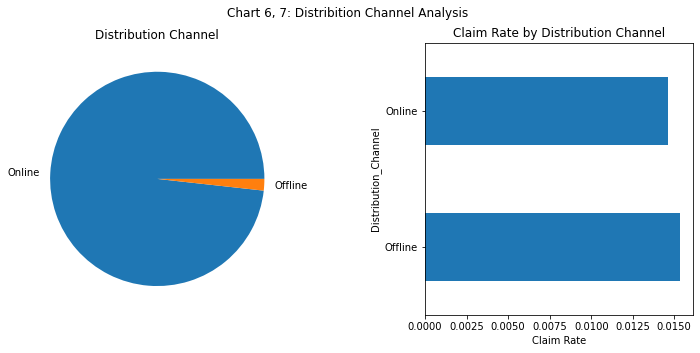

In [ ]:
df4 = df2.groupby(['Distribution_Channel'])['Claim'].value_counts(
    normalize=True).to_frame(name='Claim_Rate').reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle('Chart 6, 7: Distribition Channel Analysis')
df2.Distribution_Channel.value_counts(normalize=True).plot(
    kind="pie", title="Distribution Channel", ylabel="", ax=axes[0], figsize=(12, 5))
df4[(df4["Claim"] == "Yes")].sort_values(by=['Claim_Rate'], ascending=False).plot(kind="barh", x="Distribution_Channel",
                                                                                  y="Claim_Rate", ylabel="Claim_Rate", legend=False, title="Claim Rate by Distribution Channel", ax=axes[1])
axes[1].set_xlabel("Claim Rate")
plt.subplots_adjust(wspace=0.5)


## Net Sales and Commission
- We observed that there is a linear dependency between net sales and commission
- We wanted to find out what causes them to have different slopes


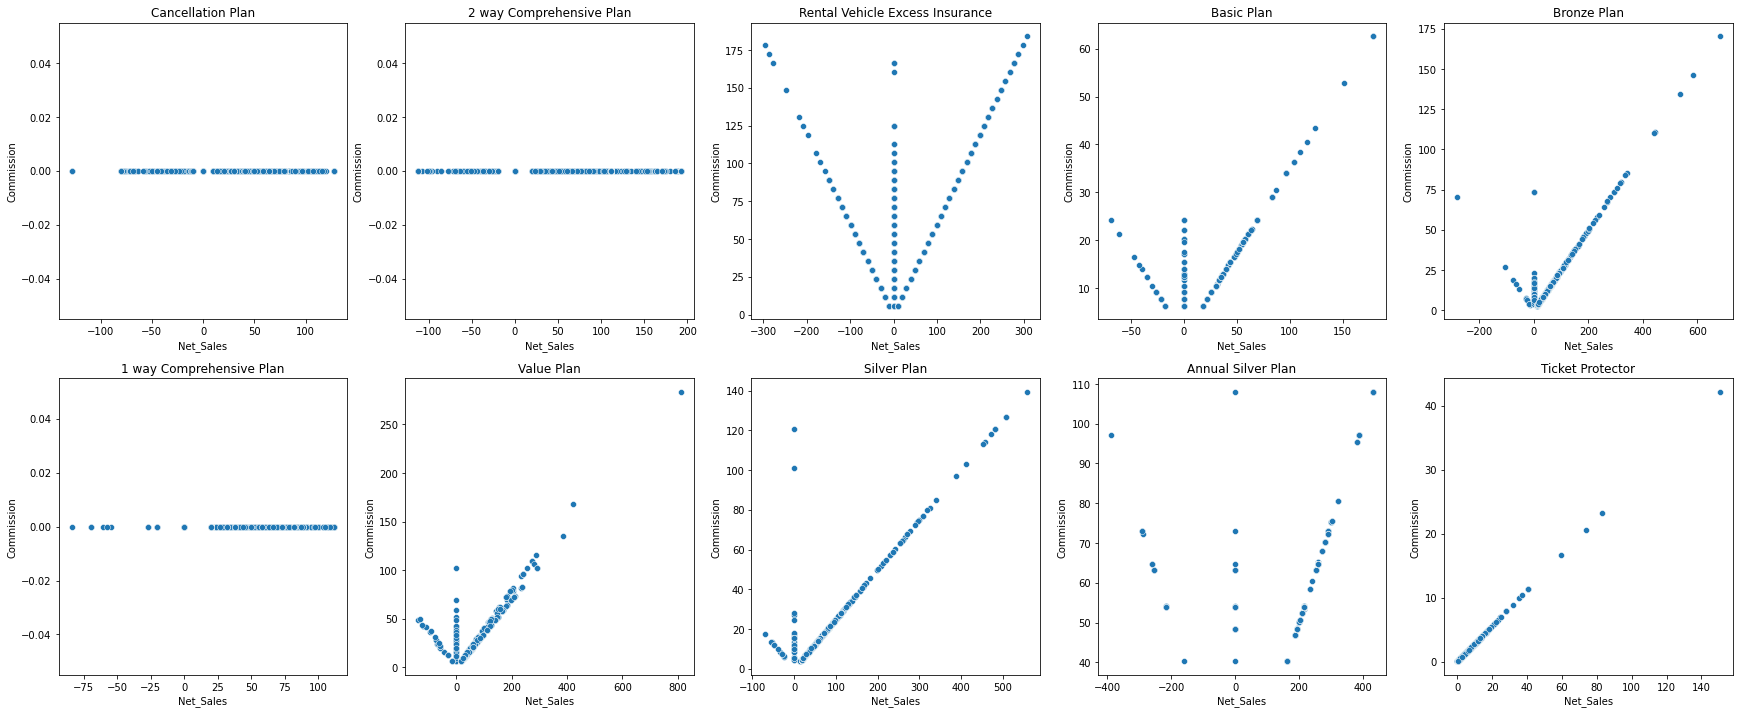

In [ ]:
topProduct_COUNT = df2.groupby(["Product"])["Net_Sales"].agg(
    "count").sort_values(ascending=False).reset_index()

plt.figure(figsize=(30, 12))

a = 1
for i in topProduct_COUNT["Product"]:
    if a <= 10:
        plt.subplot(2, 5, a)
        plt.title(i)
        sns.scatterplot(data=df2[(df2['Product'] == i)],
                        x="Net_Sales", y="Commission")
        a = a + 1
    else:
        break

plt.show()


We can easily observe the general pattern of Net Sales vs Commission as shown below.

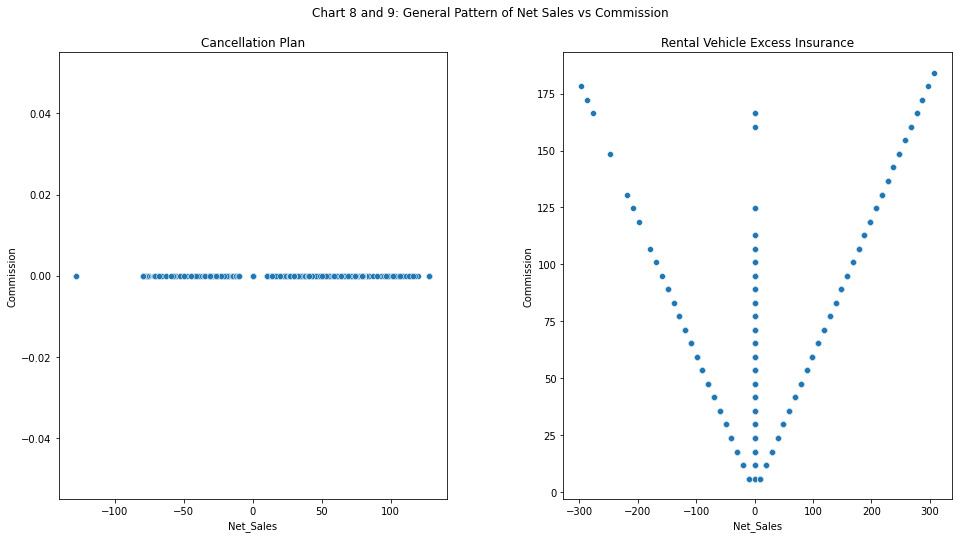

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.gcf().set_size_inches(16, 8)
plt.suptitle('Chart 8 and 9: General Pattern of Net Sales vs Commission')
sns.scatterplot(data=df2[(df2['Product'] == topProduct_COUNT["Product"][0])],
                x="Net_Sales", y="Commission", ax=ax[0])
ax[0].set_title(topProduct_COUNT["Product"][0])
sns.scatterplot(data=df2[(df2['Product'] == topProduct_COUNT["Product"][2])],
                x="Net_Sales", y="Commission", ax=ax[1])
ax[1].set_title(topProduct_COUNT["Product"][2])
# fig.tight_layout()
plt.subplots_adjust(wspace=0.3, top=0.9)


## Duration

Text(0.5, 0, 'Duration (Mean)')

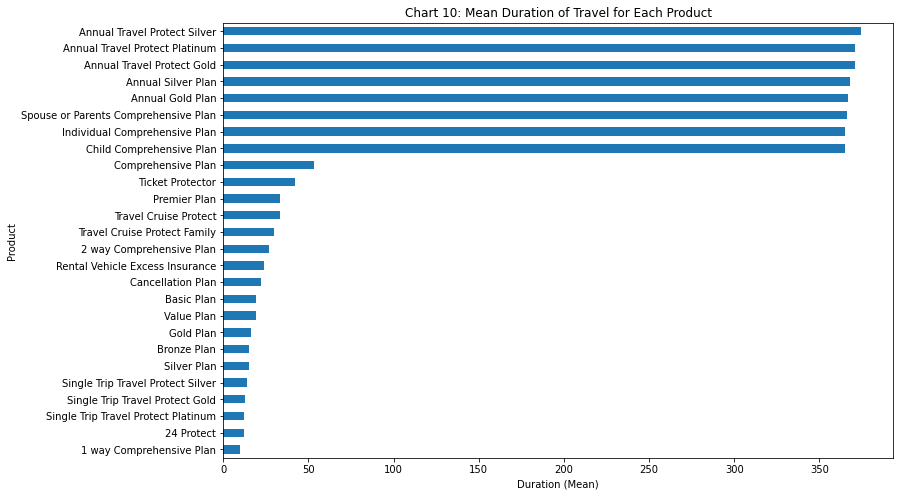

In [ ]:
df2.groupby(["Product"])["Duration"].agg("median").sort_values().plot(
    kind="barh", figsize=(12, 8), title="Chart 10: Mean Duration of Travel for Each Product")
plt.xlabel("Duration (Mean)")


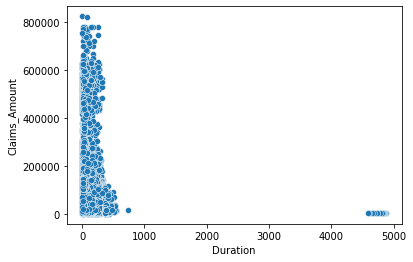

In [ ]:
sns.scatterplot(data=df2,
                x="Duration", y="Claims_Amount")


Text(0.5, 0, 'Mean Claims Amount')

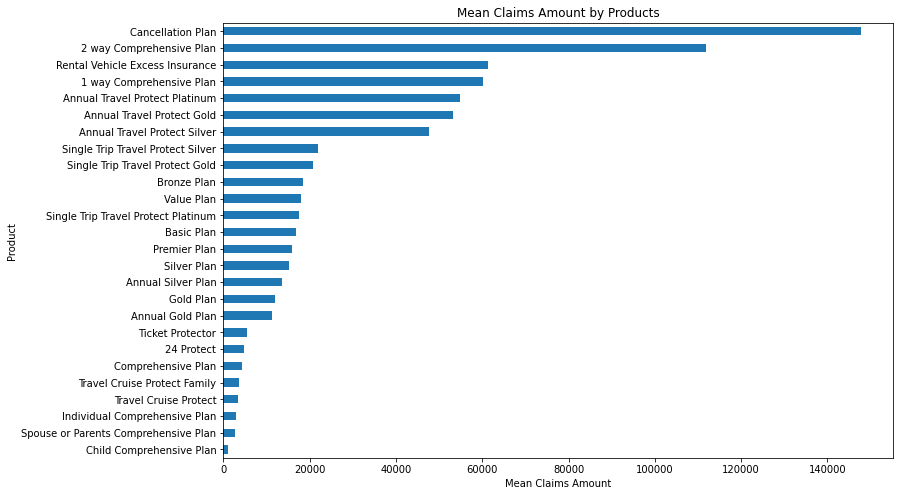

In [ ]:
df2.groupby(["Product"])["Claims_Amount"].agg("mean").sort_values().plot(
    kind="barh", figsize=(12, 8), title="Mean Claims Amount by Products")
plt.xlabel("Mean Claims Amount")


In [ ]:
df2.groupby(["Product"])["Agency_Type"].nunique().sort_values(ascending=False)


Product
Value Plan                              2
Premier Plan                            2
2 way Comprehensive Plan                1
Travel Cruise Protect Family            1
Travel Cruise Protect                   1
Ticket Protector                        1
Spouse or Parents Comprehensive Plan    1
Single Trip Travel Protect Silver       1
Single Trip Travel Protect Platinum     1
Single Trip Travel Protect Gold         1
Silver Plan                             1
Rental Vehicle Excess Insurance         1
Individual Comprehensive Plan           1
1 way Comprehensive Plan                1
Comprehensive Plan                      1
Child Comprehensive Plan                1
Cancellation Plan                       1
Bronze Plan                             1
Basic Plan                              1
Annual Travel Protect Silver            1
Annual Travel Protect Platinum          1
Annual Travel Protect Gold              1
Annual Silver Plan                      1
Annual Gold Plan          

In [ ]:
df2.groupby(["Product"])["Agency"].nunique().sort_values(ascending=False)


Product
Value Plan                              6
Premier Plan                            6
Comprehensive Plan                      3
Individual Comprehensive Plan           1
Travel Cruise Protect Family            1
Travel Cruise Protect                   1
Ticket Protector                        1
Spouse or Parents Comprehensive Plan    1
Single Trip Travel Protect Silver       1
Single Trip Travel Protect Platinum     1
Single Trip Travel Protect Gold         1
Silver Plan                             1
Rental Vehicle Excess Insurance         1
1 way Comprehensive Plan                1
2 way Comprehensive Plan                1
Child Comprehensive Plan                1
Cancellation Plan                       1
Bronze Plan                             1
Basic Plan                              1
Annual Travel Protect Silver            1
Annual Travel Protect Platinum          1
Annual Travel Protect Gold              1
Annual Silver Plan                      1
Annual Gold Plan          

In [ ]:
df2.groupby(['Product', 'Agency_Type']).first()

,,Agency,Distribution_Channel,Claim,Duration,Destination,Net_Sales,Commission,Gender,Age,Claims_Amount
Product,Agency_Type,,,,,,,,,,
1 way Comprehensive Plan,Travel Agency,EPX,Online,No,50,AUSTRALIA,24.00,0.00,None,36,42781
2 way Comprehensive Plan,Travel Agency,EPX,Online,No,39,VIET NAM,-25.00,0.00,None,36,95325
24 Protect,Airlines,ART,Online,No,56,PHILIPPINES,75.96,26.59,F,48,4103
Annual Gold Plan,Airlines,C2B,Online,No,369,SINGAPORE,389.35,97.34,M,42,6299
Annual Silver Plan,Airlines,C2B,Online,No,364,SINGAPORE,389.00,97.25,F,30,13605
Annual Travel Protect Gold,Travel Agency,LWC,Online,No,364,CHINA,0.00,102.50,F,19,4580
Annual Travel Protect Platinum,Travel Agency,LWC,Online,No,395,UNITED STATES,323.00,209.95,F,54,43202
Annual Travel Protect Silver,Travel Agency,LWC,Online,No,364,INDONESIA,0.00,43.25,M,19,4197
Basic Plan,Airlines,JZI,Online,No,33,"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",-26.00,9.10,M,118,44029


Text(0.5, 1.0, 'Chart 2: Correlation Heatmap of Numeric Variables')

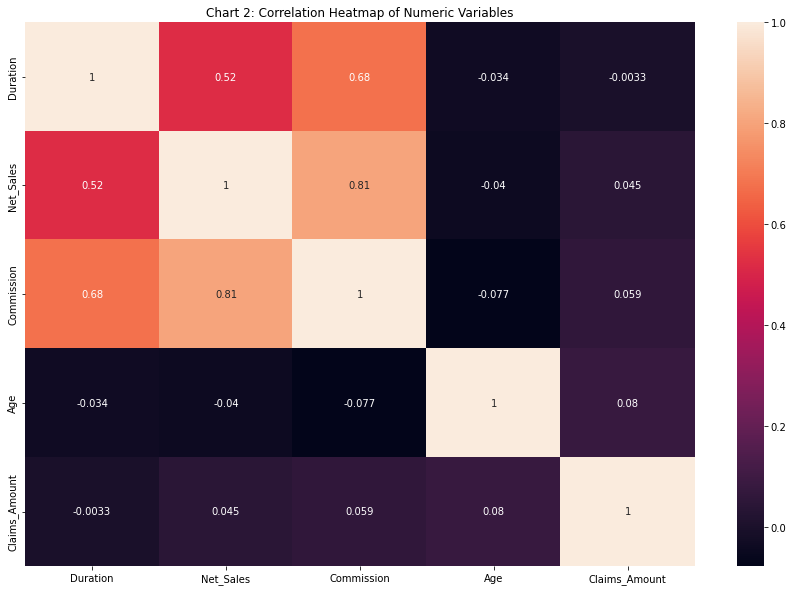

In [ ]:
pd.set_option('display.max_rows', 0)
dfff = df2[df2["Product"] == "Gold Plan"].sort_values(by="Claims_Amount")
plt.figure(figsize=(15, 10))
sns.heatmap(dfff.corr(), annot=True).set_title(
    "Chart 2: Correlation Heatmap of Numeric Variables")


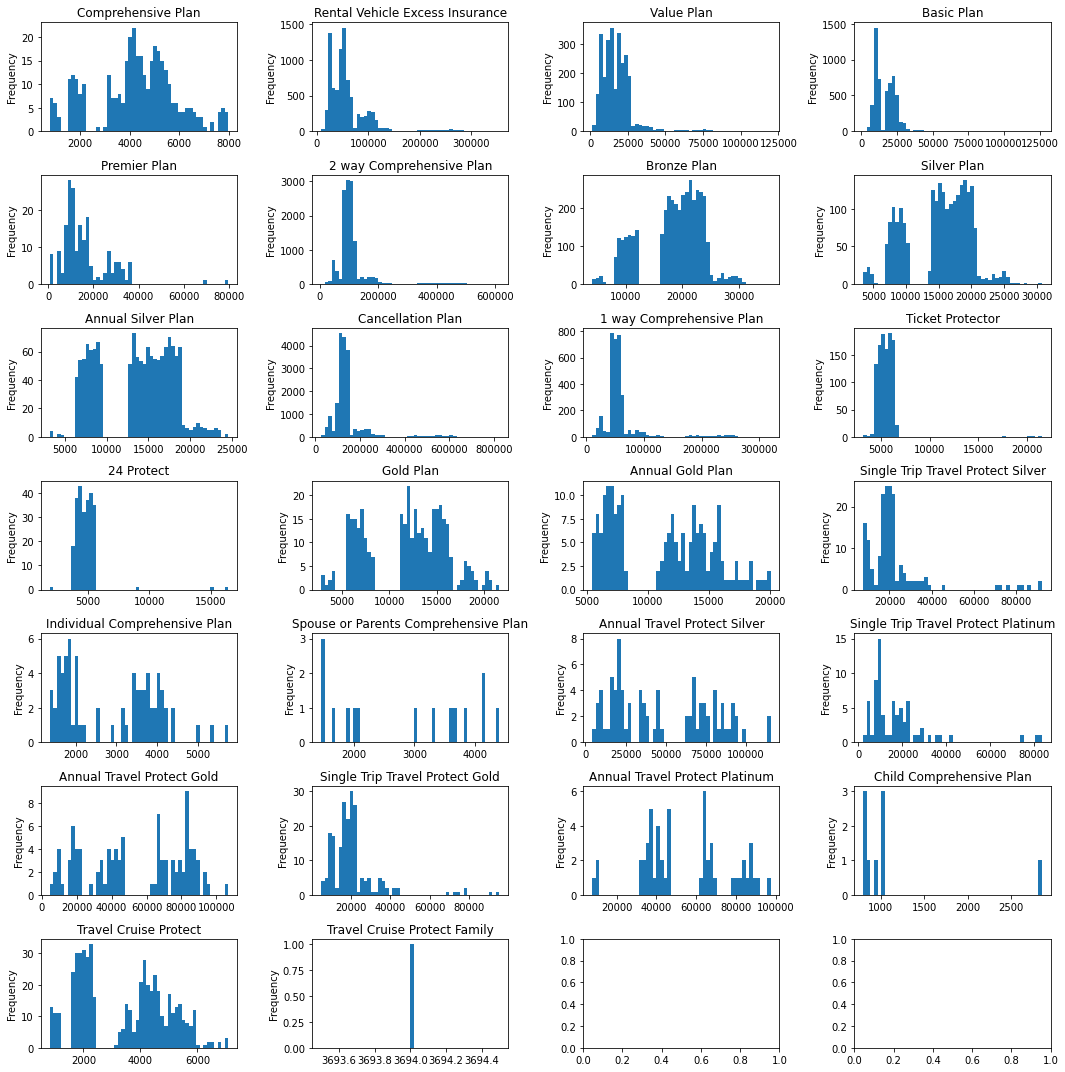

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(15, 15))
count = 0
for i in df2["Product"].unique():
    df2[df2["Product"]==i]["Claims_Amount"].plot(kind='hist', bins=50, title=i, ax=axes[count // 4, count % 4])
    count += 1
fig.tight_layout()


# Feature Selection and Engineering

## Data Cleaning

### Incorrect Data

Looking back at Net Sales and Commission, we see 2 general patterns (see Chart 8 and 9):
1. Commission is constant (e.g., Cancellation Plan)
2. Net Sales and Commission are linearly dependent when Net Sales is not equal to 0, and behave as a almost perfect even function. At the same time, Commission varies when net sales equals to 0 (e.g., Rental Vehicle Excess Insurance)

If you think very carefully, pattern 2 is so odd in some ways:
1. For Net Sales = $-S$ and Commission = $C$, in most cases, there exists another entry of Net Sales = $S$ and Commission = $C$
2. For Net Sales = 0 and Commission = $C$, in most cases, there exists another entry of Net Sales = $-S$ or $S$ and Commission = $C$
3. When Net Sales = 0, the Commission varies. However, when Net Sales is non-zero but is very close to zero, the Commission becomes very close to zero too

Pattern 2 suggested that the data is incorrect in some ways:
1. The value of Net Sales have to be non-negative, so we will take absolute value of all Net Sales (see point 1 above)
2. To ensure that Net Sales $\ge$ Commission, we will use available entries for reference to correct the Net Sales. Otherwise, we will build linear regression models for each pair of Product and Agency to interpolate the missing values (see point 2 and 3 above) 




In [ ]:
from sklearn.linear_model import LinearRegression

df5 = df2[df2["Net_Sales"] != 0]
df5["Net_Sales"] = abs(df5["Net_Sales"])


totalDf = df2.groupby(["Agency", "Product"]).first().reset_index()
totalDf = totalDf[["Product", "Agency"]]
totalDf["Model (Slope, Intercept, R2)"] = 0


dic = {i: {} for i in totalDf["Agency"].unique()}

for i, j in zip(totalDf.Product, totalDf.Agency):
    try:
        # extract "Product" and "Agency" combination in df3
        temp = df5[(df5["Product"] == i) & (df5["Agency"] == j)]
        model = LinearRegression().fit(
            np.array(temp["Commission"]).reshape((-1, 1)), temp["Net_Sales"])
        r_sq = model.score(
            np.array(np.array(temp["Commission"]).reshape((-1, 1))), temp["Net_Sales"])
        dic[j][i] = [model.coef_[0], model.intercept_, r_sq]
        totalDf.loc[(totalDf["Product"] == i) & (totalDf["Agency"] == j), "Model (Slope, Intercept, R2)"] = str(
            model.coef_[0])[:5] + ", " + str(model.intercept_)[:5] + ", "+str(r_sq)[:5]
    except:
        pass

# display model: slope, intercept, R2
totalDf


,Product,Agency,"Model (Slope, Intercept, R2)"
0,Premier Plan,ADM,"2.631, 2.842, 1.0"
1,Value Plan,ADM,"2.631, 4.263, 1.0"
2,24 Protect,ART,"2.857, 0.000, 0.999"
3,Value Plan,ART,"2.857, 1.421, 1.0"
4,Annual Gold Plan,C2B,"4.000, -0.01, 0.999"
5,Annual Silver Plan,C2B,"4.000, 0.001, 0.999"
6,Bronze Plan,C2B,"4.000, -0.00, 0.999"
7,Gold Plan,C2B,"4.000, -0.00, 0.999"
8,Silver Plan,C2B,"4.000, -0.01, 0.999"
...,...,...,...


From the dataframe above, most of the models have a high R-squared coefficient. There are 8 models require further investigation as they have slope = 0 or R-squared = 0.

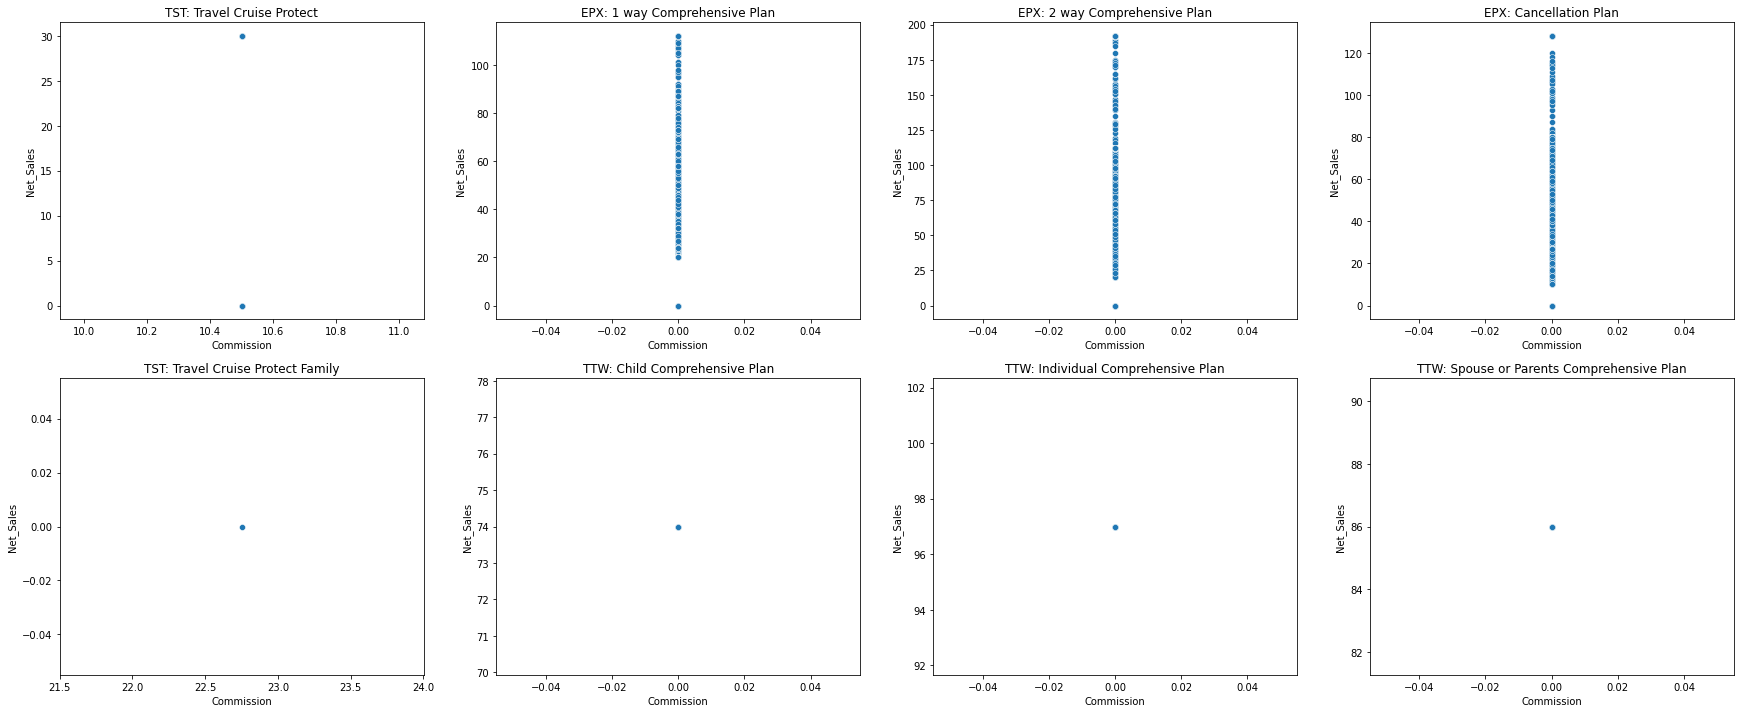

In [ ]:
df6 = df2.copy()
df6["Net_Sales"] = abs(df6["Net_Sales"])
plt.figure(figsize=(30, 12))

a = [
    ["TST", "Travel Cruise Protect"],
    ["EPX", "1 way Comprehensive Plan"],
    ["EPX", "2 way Comprehensive Plan"],
    ["EPX", "Cancellation Plan"],
    ["TST", "Travel Cruise Protect Family"],
    ["TTW", "Child Comprehensive Plan"],
    ["TTW", "Individual Comprehensive Plan"],
    ["TTW", "Spouse or Parents Comprehensive Plan"]
]

i = 1
for agency, product in a:
    # Get scatterplot for slope = 0 model
    plt.subplot(2, 4, i)
    plt.title(agency+": "+product)
    sns.scatterplot(data=(df6[(df6['Product'] == product) & (
        df6["Agency"] == agency)]), y="Net_Sales", x="Commission")
    i += 1


plt.show()


Our next step is to modify Net Sales with trivial values to another value interpolated by the linear regression models. Note that the model will only apply when R-squared $\ge$ 0.99, and the values of Net Sales will remain otherwise.

In [ ]:
def change_net_sales(x):
    try:
        # y = mX + C if r2 >= 0.99 else use remain
        return (dic[x.Agency][x.Product][0] * x.Commission) + dic[x.Agency][x.Product][1] if dic[x.Agency][x.Product][2] >= 0.99 else x.Net_Sales
    except:
        print(x)  # data that cannot find linear regression model
        return 0


df6["Net_Sales"] = df6.apply(
    lambda x: x.Net_Sales if x.Net_Sales != 0 else change_net_sales(x), axis=1)


Agency                                           TST
Agency_Type                            Travel Agency
Distribution_Channel                         Offline
Product                 Travel Cruise Protect Family
Claim                                             No
Duration                                          30
Destination                                 MALAYSIA
Net_Sales                                        0.0
Commission                                     22.75
Gender                                             M
Age                                               32
Claims_Amount                                   3694
Name: 47122, dtype: object


Based on the ouput, there is only one entry that does not have a valid linear regression model to adjust its Net Sales.

In [ ]:
df6[df6["Product"] == "Travel Cruise Protect Family"]


,Agency,Agency_Type,Distribution_Channel,Product,Claim,Duration,Destination,Net_Sales,Commission,Gender,Age,Claims_Amount
47122,TST,Travel Agency,Offline,Travel Cruise Protect Family,No,30,MALAYSIA,0.0,22.75,M,32,3694


We decided to remove this row as there is no way to know its reasonable Net Sales.

In [ ]:
df6.drop(df6[df6["Product"] == "Travel Cruise Protect Family"].index, inplace=True)


In [ ]:
sum(df6["Commission"] > df6["Net_Sales"])


0

In [ ]:
sum(df6["Net_Sales"] < 0)


0

After data cleaning, all entries satisfy Net Sales $\ge$ Commission. 

### Missing Data/Values

In [ ]:
df6.isnull().sum()


Agency                      0
Agency_Type                 0
Distribution_Channel        0
Product                     0
Claim                       0
Duration                    0
Destination                 0
Net_Sales                   0
Commission                  0
Gender                  45107
Age                         0
Claims_Amount               0
dtype: int64

In [ ]:
print('{0:.2f}'.format(df6.Gender.isnull().sum() / (df6.Gender.isnull().sum() +
      df6.Gender.count()) * 100), "% of Gender data is null.")


71.23 % of Gender data is null.


In [ ]:
# Since Gender has too many null values, we decided to drop it.
df7 = df6.drop('Gender', axis=1)


### Duplicated Data

In [ ]:
# We believe that it is almost impossible to have duplicated entries
df8 = df7.drop_duplicates()

print("Length of an original data frame :", len(df7))
print("Amount of Duplicated data removed:", len(df7) - len(df8))
print("Number of rows after deduping    :", len(df8))


Length of an original data frame : 63325
Amount of Duplicated data removed: 2
Number of rows after deduping    : 63323


### Outlier

1. Age

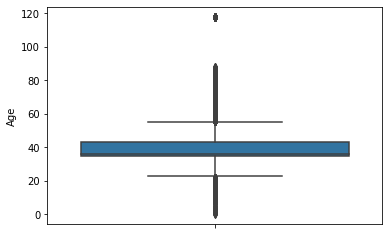

In [ ]:
sns.boxplot(y=df8['Age'])


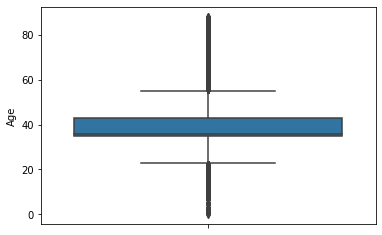

In [ ]:
# We decided to remove the outlier and focus on 0-100 years old
df9 = df8[(df8['Age'] >= 0) & (df8['Age'] <= 100)]
sns.boxplot(y=df9['Age'])


2. Duration

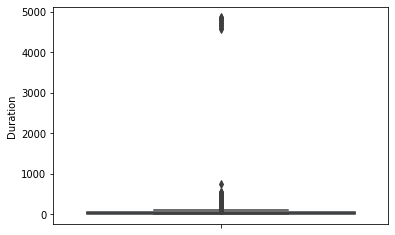

In [ ]:
sns.boxplot(y=df9['Duration'])


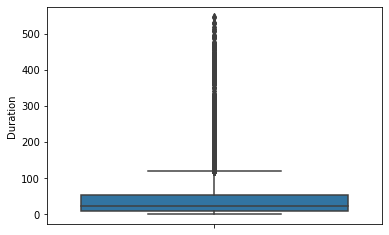

In [ ]:
# We decided to remove the outlier and focus on duration that are within 2 years (730 days)
df10 = df9[(df9['Duration'] >= 0) & (df9['Duration'] <= 730)]
sns.boxplot(y=df10['Duration'])


3. Net Sales

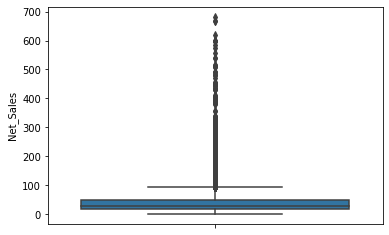

In [ ]:
sns.boxplot(y=df10['Net_Sales'])


4. Commission

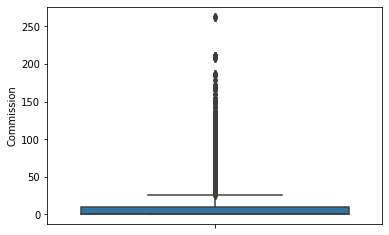

In [ ]:
sns.boxplot(y=df10['Commission'])


## Visualisation after Data Cleaning

After data cleaning, we are interested in some visualisation.

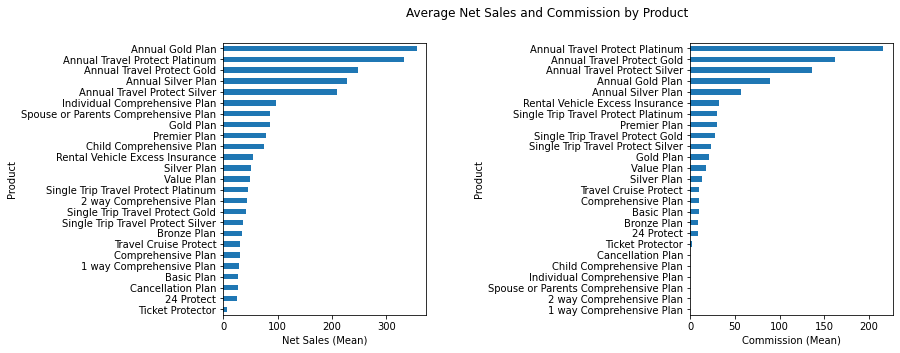

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle('Average Net Sales and Commission by Product')
df10.groupby(["Product"])["Net_Sales"].agg("mean").sort_values().plot(
    kind="barh", ax=axes[0], figsize=(12, 5))
axes[0].set_xlabel("Net Sales (Mean)")

df10.groupby(["Product"])["Commission"].agg(
    "mean").sort_values().plot(kind="barh", ax=axes[1])
axes[1].set_xlabel("Commission (Mean)")
plt.subplots_adjust(wspace=1.3)


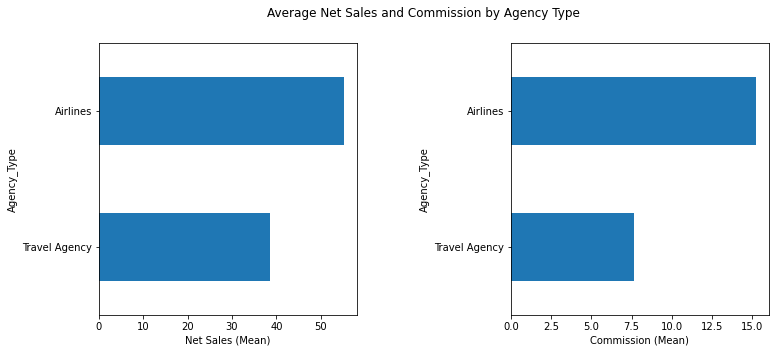

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle('Average Net Sales and Commission by Agency Type')
df10.groupby(["Agency_Type"])["Net_Sales"].agg(
    "mean").sort_values().plot(kind="barh", ax=axes[0], figsize=(12, 5))
axes[0].set_xlabel("Net Sales (Mean)")

df10.groupby(["Agency_Type"])["Commission"].agg(
    "mean").sort_values().plot(kind="barh", ax=axes[1])
axes[1].set_xlabel("Commission (Mean)")
plt.subplots_adjust(wspace=0.6)


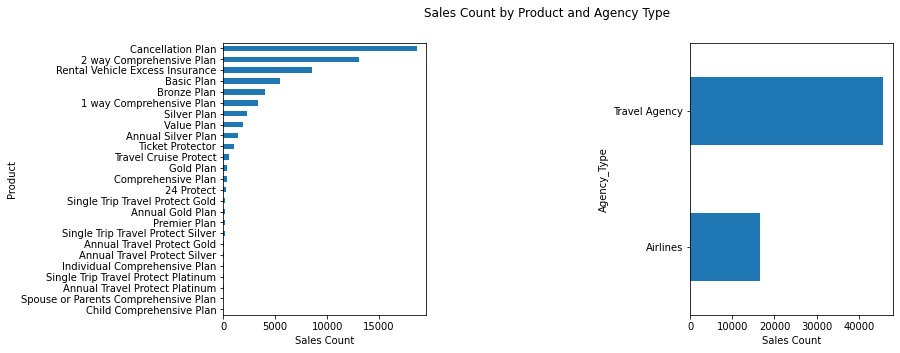

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle('Sales Count by Product and Agency Type')
df10.groupby(["Product"])["Net_Sales"].agg("count").sort_values().plot(
    kind="barh", ax=axes[0], figsize=(12, 5))
axes[0].set_xlabel("Sales Count")

df10.groupby(["Agency_Type"])["Net_Sales"].agg(
    "count").sort_values().plot(kind="barh", ax=axes[1])
axes[1].set_xlabel("Sales Count")
plt.subplots_adjust(wspace=1.3)


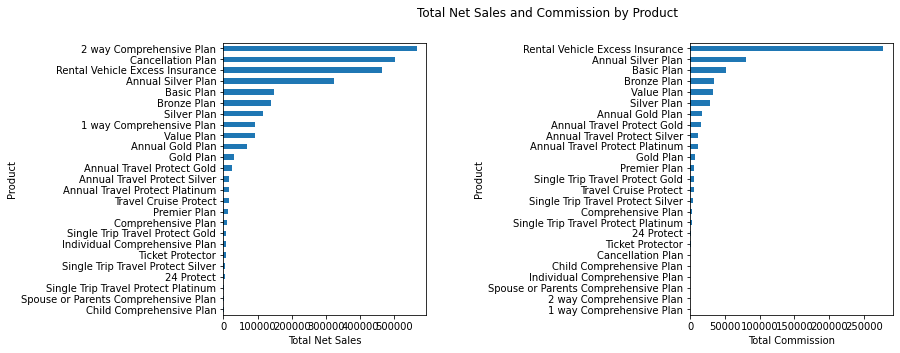

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle('Total Net Sales and Commission by Product')
df10.groupby(["Product"])["Net_Sales"].agg("sum").sort_values().plot(
    kind="barh", ax=axes[0], figsize=(12, 5))
axes[0].set_xlabel("Total Net Sales")

df10.groupby(["Product"])["Commission"].agg(
    "sum").sort_values().plot(kind="barh", ax=axes[1])
axes[1].set_xlabel("Total Commission")
plt.subplots_adjust(wspace=1.3)


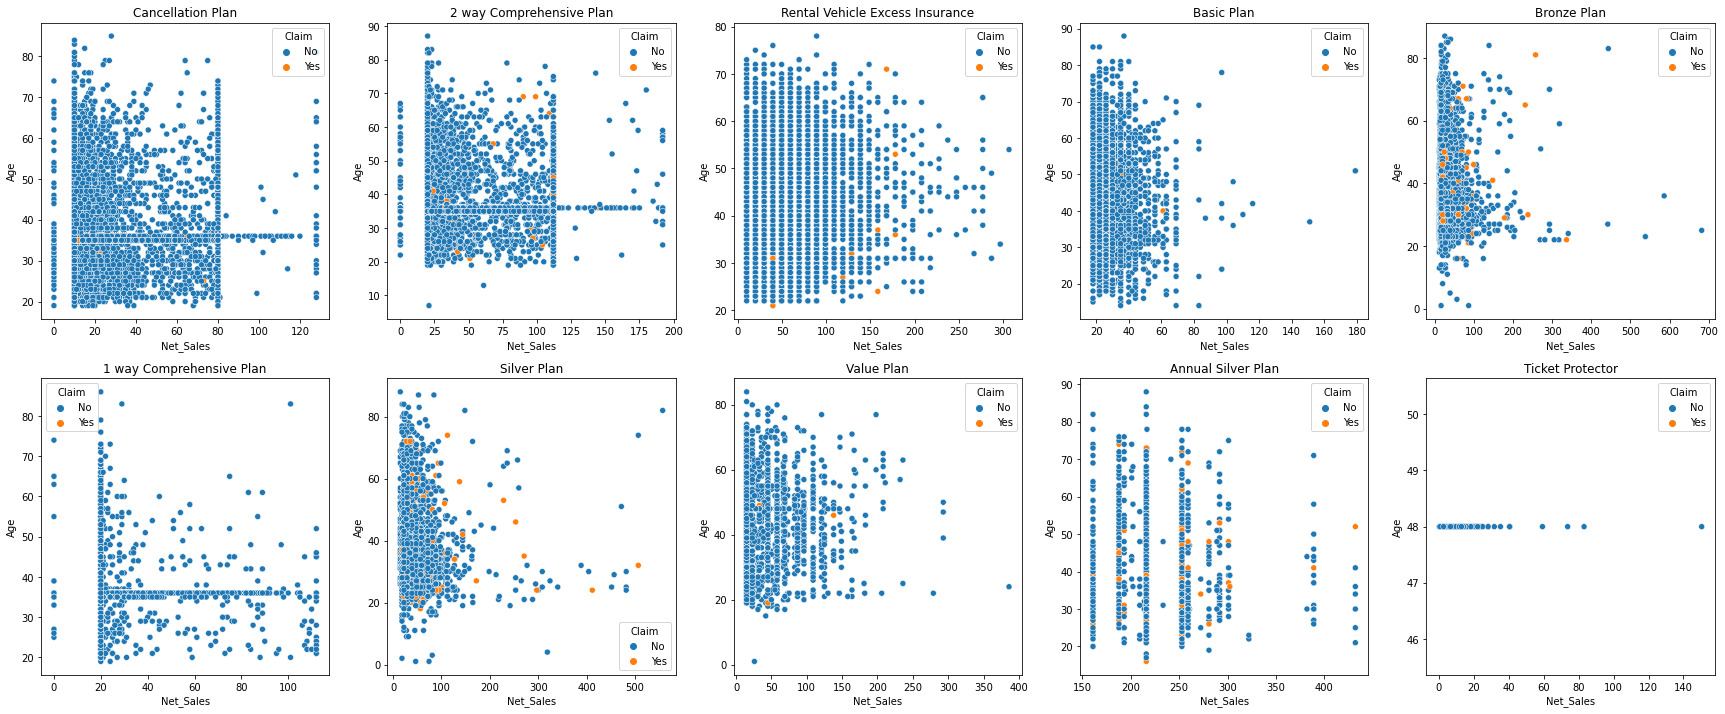

In [ ]:
topProduct_Com_COUNT = df10.groupby(["Product"])["Commission"].agg(
    "count").sort_values(ascending=False).reset_index()

plt.figure(figsize=(30, 12))

a = 1
for i in topProduct_Com_COUNT["Product"]:
    if a <= 10:
        plt.subplot(2, 5, a)
        plt.title(i)
        sns.scatterplot(data=df10[(df10['Product'] == i)],
                        x="Net_Sales", y="Age", hue="Claim")
        a = a + 1
    else:
        break

plt.show()


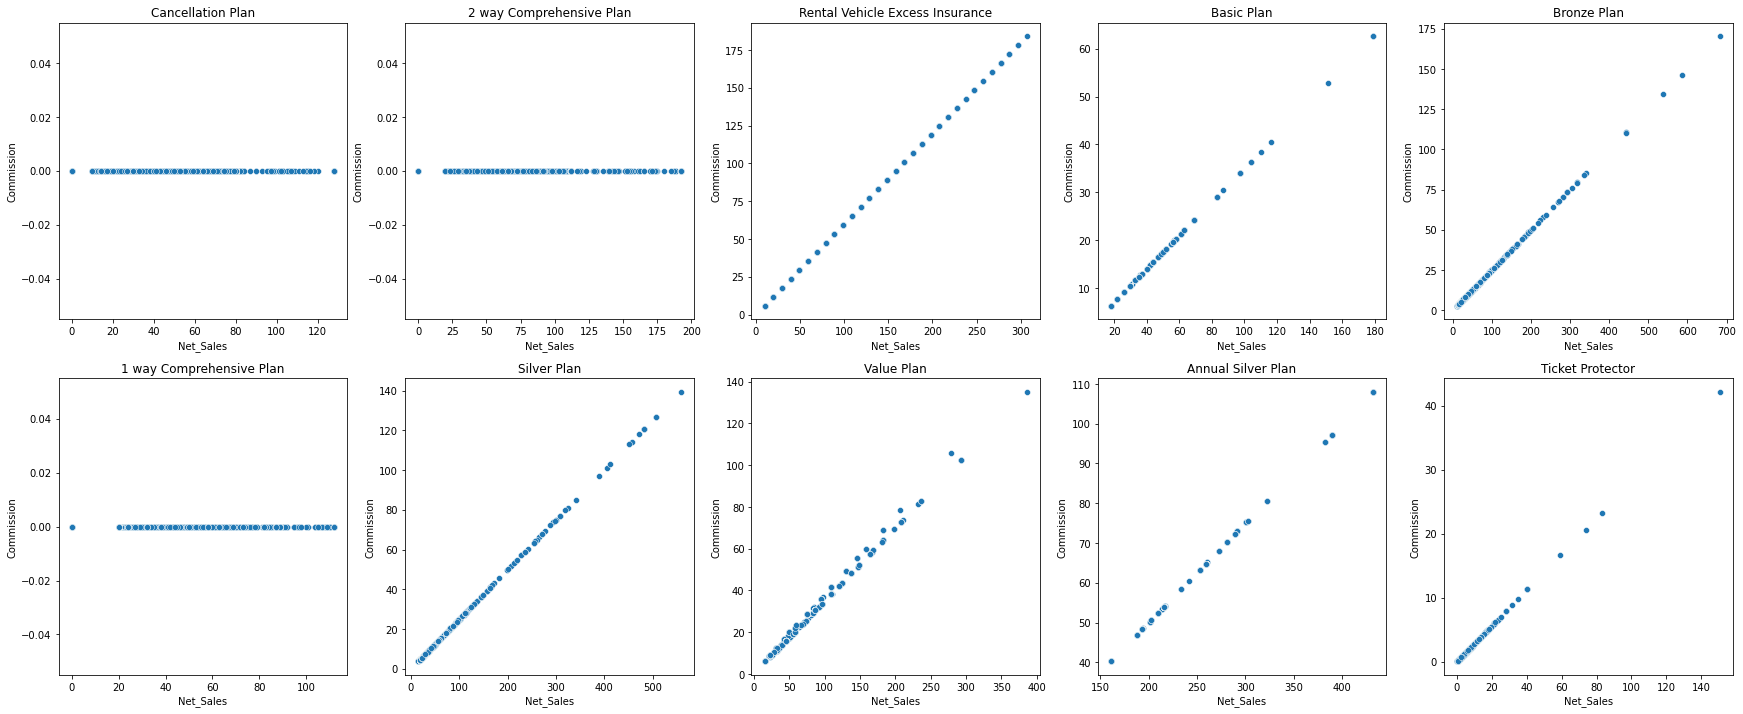

In [ ]:
topProduct_COUNT = df10.groupby(["Product"])["Net_Sales"].agg(
    "count").sort_values(ascending=False).reset_index()

plt.figure(figsize=(30, 12))

a = 1
for i in topProduct_COUNT["Product"]:
    if a <= 10:
        plt.subplot(2, 5, a)
        plt.title(i)
        sns.scatterplot(data=df10[(df10['Product'] == i)],
                        x="Net_Sales", y="Commission")
        a = a + 1
    else:
        break

plt.show()


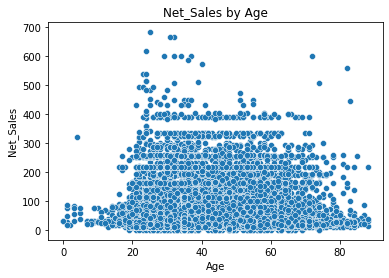

In [ ]:
sns.scatterplot(data=df10, y="Net_Sales", x="Age").set(title="Net_Sales by Age");

## Data Transformation

In [ ]:
# Split Age into Age_Group
df10["Age_Group"] = pd.cut(x=df10["Age"], bins=list(range(-1, 101, 5)), labels=[
                           str(i)+"-"+str(i+4) for i in range(0, 99, 5)])

# Drop Age column
df11 = df10.drop('Age', axis=1)


Text(0.5, 0, 'Claim Rate')

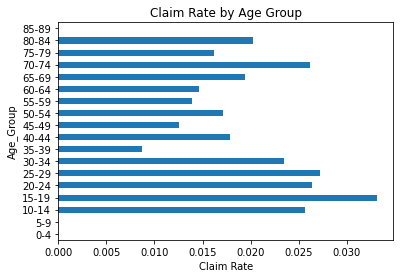

In [ ]:
ax = pd.crosstab(index=df11['Age_Group'], columns=df11['Claim'], normalize='index')[
    "Yes"].plot(kind="barh", title="Claim Rate by Age Group")
ax.set_xlabel("Claim Rate")


In [ ]:
df11

,Agency,Agency_Type,Distribution_Channel,Product,Claim,Duration,Destination,Net_Sales,Commission,Claims_Amount,Age_Group,Risk_GAM,Risk_LR,price,profit
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,29.0,9.57,6515,80-84,0.011608,0.048652,88.249600,88.249600
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,29.0,9.57,5532,70-74,0.068595,0.062364,88.249600,88.249600
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,49.5,29.70,45378,30-34,0.516308,0.343643,1338.073451,1338.073451
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,39.6,23.76,40600,30-34,0.484260,0.337628,1096.675496,1096.675496
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,19.8,11.88,55360,40-44,0.431175,0.301807,1096.675496,1096.675496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62319,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,19990,30-34,0.834059,0.777607,247.668563,247.668563
62320,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,18376,40-44,0.792588,0.678431,247.668563,247.668563
62321,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,11119,55-59,0.126991,0.489813,114.686515,114.686515
62322,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,31543,60-64,0.183387,0.462465,114.686515,114.686515


# Modelling and Evaluation

## Stage 2: Probabilistic Classifier of Claim, Introducing 'Risk' Column

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer
from statsmodels.gam.api import GLMGam, BSplines
!pip install pygam
from pygam import LogisticGAM


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 14.9 MB/s 


In [ ]:
X3 = df11.drop(columns=['Claim', 'Net_Sales',
               'Agency', 'Commission'], inplace=False)
y3 = df11['Claim']

# Encoding categorical data
le = LabelEncoder()
X3['Agency_Type'] = le.fit_transform(X3['Agency_Type'])
X3['Distribution_Channel'] = le.fit_transform(X3['Distribution_Channel'])
X3['Age_Group'] = le.fit_transform(X3['Age_Group'])
y3 = le.fit_transform(y3)

ohe = OneHotEncoder(drop=None, sparse=True, handle_unknown='error')
X3['Product'] = ohe.fit_transform(
    X3['Product'].values.reshape(-1, 1)).toarray()
X3['Destination'] = ohe.fit_transform(
    X3['Destination'].values.reshape(-1, 1)).toarray()


In [ ]:
# Split the data into training and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.2, random_state=42)


In [ ]:
# Oversampling imbalance data
smote = SMOTE(random_state=42)
X3_SMOTE, y3_SMOTE = smote.fit_resample(X3_train, y3_train)


### Linear Regression by statsmodel

In [ ]:
log_reg = Logit(y3_SMOTE, X3_SMOTE).fit()

In [ ]:
print(log_reg.summary())


In [ ]:
log_reg.params.sort_values().plot(kind='barh', title="Feature Importance");


In [ ]:
# Perform predictions on the test datdaset
threshold = 0.5
yhat = log_reg.predict(X3_test)
prediction = (yhat > threshold).astype(int)

cm = confusion_matrix(y3_test, prediction)
cm_display = ConfusionMatrixDisplay(cm).plot()

# Logistic Regression Classification Report
print(classification_report(y3_test, prediction))


In [ ]:
yhat.plot(kind='hist', bins=100);


In [ ]:
odds_ratios = pd.DataFrame(
    {
        "Odds_Ratio": log_reg.params,
        "Lower CI": log_reg.conf_int()[0],
        "Upper CI": log_reg.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)


In [ ]:
odds_ratios[["Odds_Ratio"]].sort_values(
    by="Odds_Ratio").plot(kind='barh', title="Odds Ratio");


### Generalised Addictive Model by pyGAM

In [ ]:
gam = LogisticGAM().fit(X3_SMOTE, y3_SMOTE)

In [ ]:
print(gam.accuracy(X3_train, y3_train))
print(gam.accuracy(X3_test, y3_test))

0.7670831745522373
0.7600481347773766


In [ ]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     44.3325
Link Function:                        LogitLink Log Likelihood:                                -48904.5578
Number of Samples:                        98224 AIC:                                            97897.7806
                                                AICc:                                           97897.8234
                                                UBRE:                                                2.997
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2817
Feature Function                  Lam

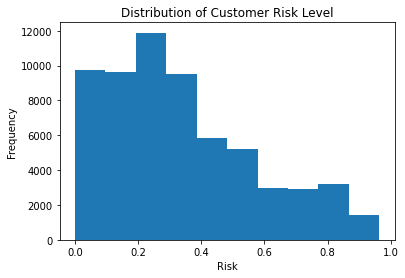

In [ ]:
a=pd.Series(gam.predict_mu(X3)).plot(kind='hist')
a.set_xlabel("Risk")
plt.title("Distribution of Customer Risk Level");

# Add New Column 'Risk', Start Design Pricing Strategy

In [ ]:
gamrisk = pd.Series(gam.predict_mu(X3)).reset_index(drop=True)
lrrisk = log_reg.predict(X3).reset_index(drop=True)
df11.reset_index(drop=True, inplace=True)
df11['Risk_GAM'] = gamrisk
df11['Risk_LR'] = lrrisk
df11.head()

## EDA

In [ ]:
#df12 = df11.copy()
df12=pd.read_csv("datasetWith2Rates.csv")
df11=df12.copy()

In [ ]:
claimdf = df11.groupby(['Product', 'Agency_Type'])['Claim'].value_counts(
    normalize=True).to_frame(name='Claim_Rate').reset_index()

claimdf2 = claimdf[(claimdf["Claim"] == "No")].drop(columns='Claim').reset_index(drop=True)

claimdf3 = claimdf2.copy()
claimdf3['Claim_Rate'] = 1 - claimdf2['Claim_Rate']

claimdf3.sort_values(by='Claim_Rate')

In [ ]:
#pd.set_option('display.max_rows', 100)
claimsamt1 = df11.groupby(['Product', 'Agency_Type']).agg({'Claims_Amount':['mean', 'median', 'std', 'count']})
claimsamt1

In [ ]:
claimsamt2 = claimsamt1.copy()
claimsamt2['std/sqrt(n)'] = claimsamt1['Claims_Amount']['std'] / ((claimsamt1['Claims_Amount']['count'])**0.5)
claimsamt2.reset_index(inplace=True)
claimsamt2

In [ ]:
price1 = claimsamt2.copy()
price2 = price1.merge(claimdf3, on=['Product', 'Agency_Type'])
price3 = price2.drop(price2.columns[[2, 3]], axis=1)
price4 = price3.set_axis(['Product', 'Agency_Type', 'mean_claims_amount', 'median_claims_amount',
                         'std_claims_amount', 'count', 'Standard_Error', 'Claim_Rate'], axis=1, inplace=False)
price5 = price4.copy()
price5['base_price'] = price4["mean_claims_amount"] * price4["Claim_Rate"]
price5.sort_values(by='base_price')

In [ ]:
dff = price5.iloc[:,[0,1,6,8]]
dic={i:{} for i in dff["Product"]}
for i,j,k,l in zip(dff["Product"],dff["Agency_Type"],dff["base_price"],dff.Standard_Error):
  dic[i][j]=[k,l]


In [ ]:
dic["Comprehensive Plan"]["Travel Agency"]

In [ ]:
def se(risk):
  if risk<=0.25:
    return 1
  elif risk>0.25 and risk<=0.5:
    return 5
  elif risk>0.5 and risk<=0.75:
    return 10
  else:
    return 15
df11["price"]=df11.apply(lambda x: dic[x.Product][x.Agency_Type][0]+  (((x.Risk_GAM//0.25)+1)*0.5)*dic[x.Product][x.Agency_Type][1],axis=1)
#df11["price"]=df11.apply(lambda x: dic[x.Product][x.Agency_Type][0]+se(x.Risk_GAM)*dic[x.Product][x.Agency_Type][1],axis=1)
#df11.apply(lambda x: dic[x.Product][x.Agency_Type][1],axis=1)

In [ ]:
df11

Risk

(0, 0.25]: base price + 1 SE

(0.25, 0.5]: base price + 5 SE

(0.5, 0.75]: base price + 10 SE

(0.75, 1]: base price + 15 SE

In [ ]:
df11["profit"]=df11.apply(lambda x: x.price if x.Claim=="No" else x.price-x.Claims_Amount,axis=1)

In [ ]:
df11

In [ ]:
df11.groupby(["Product","Agency_Type"])["profit"].mean()


In [ ]:
dic["2 way Comprehensive Plan"]["Travel Agency"][1]

In [ ]:
df11[df11["price"]>=df11["Claims_Amount"]]

In [ ]:
#df11["Net_Sales_Profit"]=df11.apply(lambda x: x.Net_Sales if x.Claim=="No" else x.Net_Sales-x.Claims_Amount,axis=1)
df11.groupby(["Product","Agency_Type"])["Net_Sales_Profit"].sum().to_frame()

In [ ]:
df11[df11["Product"]=="Annual Travel Protect Silver"]["Claims_Amount"].sort_values()

In [ ]:
def profit_margin(df):
  return df.groupby(["Product","Agency_Type"]).apply(lambda x: x["profit"].sum()/x["price"].sum())#.to_frame().rename(columns={0:"Profit Margin"})

In [ ]:
#df11.groupby(["Product","Agency_Type"]).apply(lambda x: x["profit"].sum()/x["price"].sum())
profit_margin(df11)

In [ ]:
df11[(df11["Product"]=="2 way Comprehensive Plan")]["Claims_Amount"].plot(kind="hist",bins=1000)
#df11["Claims_Amount"].plot(kind="hist",bins=1000)

#DH Idea

Risk

(0, 0.25]: claim amount * 5%

(0.25, 0.5]: claim amount * 10%

(0.5, 0.75]: claim amount * 25%

(0.75, 1]: claim amount * 50%

claim rate can be threshold

In [ ]:
df13=df12.copy()

In [ ]:
percent=[0.05,0.10,0.25,0.5]
df13["price"]=df13.apply(lambda x: x.Claims_Amount*(percent[int(x.Risk_GAM//0.25)]), axis=1)

In [ ]:
df13["profit"]=df13.apply(lambda x: x.price if x.Claim=="No" else x.price-x.Claims_Amount,axis=1)

In [ ]:
df13.groupby(["Product","Agency_Type"])["profit"].mean()

In [ ]:
profit_margin(df13)

In [ ]:
df13[df13["price"]>=df13["Claims_Amount"]]

##Ze Li Idea

In [ ]:
df14 = df12.copy()

In [ ]:
df15 = df14.merge(claimdf3, on=['Product', 'Agency_Type'])
df15.head()

,Agency,Agency_Type,Distribution_Channel,Product,Claim,Duration,Destination,Net_Sales,Commission,Claims_Amount,Age_Group,Risk_GAM,Risk_LR,Claim_Rate
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,29.0,9.57,6515,80-84,0.011481,0.046904,0.012579
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,29.0,9.57,5532,70-74,0.067704,0.059932,0.012579
2,CSR,Travel Agency,Offline,Comprehensive Plan,No,92,MALAYSIA,29.0,9.57,4495,70-74,0.068181,0.039637,0.012579
3,CSR,Travel Agency,Offline,Comprehensive Plan,No,92,MALAYSIA,29.0,9.57,5256,75-79,0.047750,0.035004,0.012579
4,CBH,Travel Agency,Offline,Comprehensive Plan,No,36,THAILAND,29.0,9.57,3839,60-64,0.105612,0.039673,0.012579


In [ ]:

df15["price"]=df15.apply(lambda x: x.Claims_Amount*max(x.Risk_GAM/2, x.Claim_Rate), axis=1)

In [ ]:
df15["profit"]=df15.apply(lambda x: x.price if x.Claim=="No" else x.price-x.Claims_Amount,axis=1)

In [ ]:
save=df15.groupby(["Product","Agency_Type"])["profit"].mean().to_frame().rename(columns={"profit":"Average Profit"})

In [ ]:
#dff=profit_margin(df15)
#save["Profit Margin"]=dff
#dff["Average Profit"]=save
pd.set_option('display.max_rows', 30)
save.sort_values(by=["Profit Margin"],ascending=False)

,,Average Profit,Profit Margin
Product,Agency_Type,,
24 Protect,Airlines,877.112245,1.000000
Premier Plan,Airlines,3543.763998,1.000000
Child Comprehensive Plan,Travel Agency,394.809337,1.000000
Basic Plan,Airlines,4870.785090,0.985785
Travel Cruise Protect,Travel Agency,285.154350,0.979073
1 way Comprehensive Plan,Travel Agency,6017.143672,0.972980
Cancellation Plan,Travel Agency,16662.386531,0.972523
Value Plan,Airlines,4681.478001,0.970962
Ticket Protector,Airlines,1258.567217,0.969898


# **Old code below**

## Interest variable: Claim

### Data Preprocessing & Data Transforamtion

In [ ]:
# Set variables for the targets and features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X = df11.drop(columns='Claim', inplace=False)
y = df11['Claim']

# Encoding categorical data

le = LabelEncoder()
X['Agency_Type'] = le.fit_transform(X['Agency_Type'])
X['Distribution_Channel'] = le.fit_transform(X['Distribution_Channel'])
X['Age_Group'] = le.fit_transform(X['Age_Group'])
y = le.fit_transform(y)

ohe = OneHotEncoder(drop=None, sparse=True, handle_unknown='error')
X['Agency'] = ohe.fit_transform(X['Agency'].values.reshape(-1, 1)).toarray()
X['Product'] = ohe.fit_transform(X['Product'].values.reshape(-1, 1)).toarray()
X['Destination'] = ohe.fit_transform(
    X['Destination'].values.reshape(-1, 1)).toarray()


In [ ]:
# Feature Selection (VarianceThreshold)
# Feature selector that removes all low-variance features.
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X_transform = selector.fit_transform(X, y)


In [ ]:
# Load libraries

# Scale the data
from sklearn.preprocessing import StandardScaler
# Pipeline, Gridsearch, Train-test split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
# Plot the confusion matrix at the end of the tutorial
from sklearn.metrics import plot_confusion_matrix
# Regression Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


### Split Data

Applying a 70-30 split to form training data and testing data

In [ ]:
# Split the data into training test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_transform, y, test_size=0.3, random_state=42)


### Pipeline

Oversampling, Normalization, Fitting classifiers to training data

In [ ]:
pipe_lr = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                             ['scl', StandardScaler(with_mean=False)],
                             ['clf', LogisticRegression(random_state=42, verbose=3, n_jobs=12)]])

pipe_dt = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                             ['scl', StandardScaler(with_mean=False)],
                             ['clf', DecisionTreeClassifier(random_state=42)]])

pipe_rf = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                             ['scl', StandardScaler(with_mean=False)],
                             ['clf', RandomForestClassifier(random_state=42, verbose=3, n_jobs=12)]])

pipe_knn = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                              ['scl', StandardScaler(with_mean=False)],
                              ['clf', KNeighborsClassifier(n_jobs=12)]])

pipe_svm = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                              ['scl', StandardScaler(with_mean=False)],
                              ['clf', SVC(random_state=42, verbose=3)]])

pipe_xgb = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                              ['scl', StandardScaler(with_mean=False)],
                              ['clf', XGBClassifier(random_state=42, verbosity=3, n_jobs=12)]])

pipe_gb = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                             ['scl', StandardScaler(with_mean=False)],
                             ['clf', GradientBoostingClassifier(random_state=42, verbose=3)]])


### GridSearch

In [ ]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50, 100, 150]
learning_rates = [.1, .2, .3]
learning_rates_gb = [0.01, 0.1, 1, 10, 100]

lr_param_grid = [{'clf__penalty': ['l1', 'l2'],
                  'clf__C': param_range_fl,
                  'clf__solver': ['liblinear']}]

dt_param_grid = [{'clf__criterion': ['gini', 'entropy'],
                  'clf__min_samples_leaf': param_range,
                  'clf__max_depth': param_range,
                  'clf__min_samples_split': param_range[1:]}]

rf_param_grid = [{'clf__min_samples_leaf': param_range,
                  'clf__max_depth': param_range,
                  'clf__min_samples_split': param_range[1:]}]

knn_param_grid = [{'clf__n_neighbors': param_range,
                   'clf__weights': ['uniform', 'distance'],
                   'clf__metric': ['euclidean', 'manhattan']}]

svm_param_grid = [{'clf__kernel': ['linear', 'rbf'],
                   'clf__C': param_range}]

xgb_param_grid = [{'clf__learning_rate': learning_rates,
                   'clf__max_depth': param_range,
                   'clf__min_child_weight': param_range[:2],
                   'clf__subsample': param_range_fl,
                   'clf__n_estimators': n_estimators}]

gb_param_grid = [{'clf__learning_rate': learning_rates_gb,
                  'clf__max_depth': param_range,
                  'clf__n_estimators': n_estimators}]


In [ ]:
cv = KFold(n_splits=3, shuffle=True, random_state=42)

lr_grid_search = GridSearchCV(estimator=pipe_lr,
                              param_grid=lr_param_grid,
                              scoring='accuracy',
                              cv=cv,
                              verbose=3, n_jobs=-1)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
                              param_grid=dt_param_grid,
                              scoring='accuracy',
                              cv=cv,
                              verbose=3, n_jobs=-1)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
                              param_grid=rf_param_grid,
                              scoring='accuracy',
                              cv=cv,
                              verbose=3, n_jobs=-1)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
                               param_grid=knn_param_grid,
                               scoring='accuracy',
                               cv=cv,
                               verbose=3, n_jobs=-1)
svm_grid_search = GridSearchCV(estimator=pipe_svm,
                               param_grid=svm_param_grid,
                               scoring='accuracy',
                               cv=cv,
                               verbose=3, n_jobs=-1)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
                               param_grid=xgb_param_grid,
                               scoring='accuracy',
                               cv=cv,
                               verbose=3, n_jobs=-1)
gb_grid_search = GridSearchCV(estimator=pipe_gb,
                              param_grid=gb_param_grid,
                              scoring='accuracy',
                              cv=cv,
                              verbose=3, n_jobs=-1)


In [ ]:
#  svm_grid_search Required need too long time to run
grids = [lr_grid_search, dt_grid_search, rf_grid_search,
         knn_grid_search, xgb_grid_search, gb_grid_search]
for pipe in grids:
    pipe.fit(X_train, y_train)


### Model Evaluation

In [ ]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees',
             2: 'Random Forest', 3: 'K-Nearest Neighbors',
             4: 'XGBoost', 5: 'Gradient Boost', 6: 'Support Vector Machines', }

for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(
        grid_dict[i], model.score(X_test, y_test)))
    print('{} Best Params: {}\n'.format(grid_dict[i], model.best_params_))

# Results show that K-Nearest Neighbors has the highest accuracy 0.9816


In [ ]:
feature_importance = pd.DataFrame({'feature': list(
    X.columns), 'feature_importance': grids[5].best_estimator_.named_steps['clf'].feature_importances_})
print(feature_importance)

# Results shows that Agency_Type is most significant among other features. Duration and Age_Group are also important in some extent, having feature importances around 0.2


## Interest variable: Net Sales

Data Preprocessing 

In [ ]:
# Set variables for the targets and features
X2 = df11.drop(columns=['Net_Sales', 'Commission', 'Claim'], inplace=False)
y2 = df11['Net_Sales']


In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
X2['Agency_Type'] = le.fit_transform(X2['Agency_Type'])
X2['Distribution_Channel'] = le.fit_transform(X2['Distribution_Channel'])
X2['Age_Group'] = le.fit_transform(X2['Age_Group'])

ohe = OneHotEncoder(handle_unknown='error')
X2['Agency'] = ohe.fit_transform(X2['Agency'].values.reshape(-1, 1)).toarray()
X2['Product'] = ohe.fit_transform(
    X2['Product'].values.reshape(-1, 1)).toarray()
X2['Destination'] = ohe.fit_transform(
    X2['Destination'].values.reshape(-1, 1)).toarray()


In [ ]:
# Feature Selection (VarianceThreshold)
# Feature selector that removes all low-variance features.
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X2_transform = selector.fit_transform(X2, y2)


In [ ]:
# Load libraries

# Pipeline, Gridsearch, Train-test split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

# Regression Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error


### Split Data

Applying a 70-30 split to form training data and testing data

In [ ]:
# Split the data into training test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_transform, y2, test_size=0.3, random_state=42)


### Pipeline

Normalization, Fitting Regression to training data

In [ ]:
pipe_dt = Pipeline([('scl', StandardScaler(with_mean=False)),
                    ('clf', DecisionTreeRegressor(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler(with_mean=False)),
                    ('clf', RandomForestRegressor(random_state=42, verbose=3, n_jobs=-1))])
pipe_knn = Pipeline([('scl', StandardScaler(with_mean=False)),
                    ('clf', KNeighborsRegressor(n_jobs=-1))])
pipe_svr = Pipeline([('scl', StandardScaler(with_mean=False)),
                     ('clf', SVR(verbose=3))])
pipe_xgb = Pipeline([('scl', StandardScaler(with_mean=False)),
                     ('clf', XGBRegressor(random_state=42, verbosity=3, n_jobs=-1))])
pipe_gb = Pipeline([('scl', StandardScaler(with_mean=False)),
                    ('clf', GradientBoostingRegressor(random_state=42, verbose=3))])


### GridSearch

In [ ]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50, 100, 150]
learning_rates = [.1, .2, .3]
learning_rates_gb = [0.01, 0.1, 1, 10, 100]

dt_param_grid = [{'clf__criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
                  'clf__min_samples_leaf': param_range,
                  'clf__max_depth': param_range,
                  'clf__min_samples_split': param_range[1:]}]

rf_param_grid = [{'clf__min_samples_leaf': param_range,
                  'clf__max_depth': param_range,
                  'clf__min_samples_split': param_range[1:]}]

knn_param_grid = [{'clf__n_neighbors': param_range,
                   'clf__weights': ['uniform', 'distance'],
                   'clf__metric': ['euclidean', 'manhattan']}]

svr_param_grid = [{'clf__kernel': ['linear', 'rbf'],
                   'clf__C': param_range}]

xgb_param_grid = [{'clf__learning_rate': learning_rates,
                   'clf__max_depth': param_range,
                   'clf__min_child_weight': param_range[:2],
                   'clf__subsample': param_range_fl,
                   'clf__n_estimators': n_estimators}]

gb_param_grid = [{'clf__learning_rate': learning_rates_gb,
                  'clf__max_depth': param_range,
                  'clf__n_estimators': n_estimators}]


In [ ]:
cv = KFold(n_splits=3, shuffle=True, random_state=42)

dt_grid_search = GridSearchCV(estimator=pipe_dt,
                              param_grid=dt_param_grid,
                              scoring='neg_root_mean_squared_error',
                              cv=cv,
                              verbose=3,
                              n_jobs=-1)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
                              param_grid=rf_param_grid,
                              scoring='neg_root_mean_squared_error',
                              cv=cv,
                              verbose=3,
                              n_jobs=-1)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
                               param_grid=knn_param_grid,
                               scoring='neg_root_mean_squared_error',
                               cv=cv,
                               verbose=3, n_jobs=-1)
svr_grid_search = GridSearchCV(estimator=pipe_svr,
                               param_grid=svr_param_grid,
                               scoring='neg_root_mean_squared_error',
                               cv=cv,
                               verbose=3, n_jobs=-1)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
                               param_grid=xgb_param_grid,
                               scoring='neg_root_mean_squared_error',
                               cv=cv,
                               verbose=3, n_jobs=-1)
gb_grid_search = GridSearchCV(estimator=pipe_gb,
                              param_grid=gb_param_grid,
                              scoring='neg_root_mean_squared_error',
                              cv=cv,
                              verbose=3, n_jobs=-1)


In [ ]:
grids2 = [dt_grid_search, rf_grid_search, knn_grid_search,
          svr_grid_search, xgb_grid_search, gb_grid_search]
for pipe in grids2:
    pipe.fit(X2_train, y2_train)


### Model Evaluation

In [ ]:
grid2_dict = {0: 'Decision Trees',
              1: 'Random Forest',
              2: 'K-Nearest Neighbors',
              3: 'Support Vector Machines',
              4: 'XGBoost',
              5: 'Gradient Boost'}

for i, model in enumerate(grids2):
    print('{} Test neg_root_mean_squared_error: {}'.format(
        grid2_dict[i], model.best_score_))
    print('{} Best Params: {}\n'.format(grid2_dict[i], model.best_params_))

# Results show that XGBoost has the least RMSE, 31.98. Gradient Boost, Random Forest and Decision Trees also have decent performance.


In [ ]:
feature_importance = pd.DataFrame({'feature': list(
    X2.columns), 'feature_importance': model.best_estimator_.named_steps['clf'].feature_importances_})
print(feature_importance)

# Results show that Duration is most significant among other features. Distribution_Channel also has feature importance of 0.2287


In [ ]:
import itertools

todo = ["Agency_Type", "Distribution_Channel", "Duration", "Age_Group"]
lst = [list(set(X2[i].unique())) for i in todo]
list(itertools.product(*lst))

# Agency, Agency_Type, Distribution_Channel (Offline: 0, Online: 1), Product, Duration, Destination, Age_Group
final = [[0, a, b, 0, c, 0, d] for a, b, c, d in list(itertools.product(*lst))]

net_sales_list_distribution = list(grids2[4].predict(final))

best_net_sales = net_sales_list_distribution.index(
    max(net_sales_list_distribution))
print(best_net_sales)


In [ ]:
# Agency, Agency_Type, Distribution_Channel, Product, Duration, Destination, Age_Group
final[best_net_sales]

# Our best net sales is achieved when [., Airlines, Online,., 290 days,., 75-79 years old ]


Agency_Type 
Airline = 0, Travel Agency = 1

Distribution_Channel
Offline = 0, Online = 1

Duration
Amount of Days

Age_Group
0-4 = 1
5-9 = 2
10-14 = 3
15-19 = 4
20-24 = 5
25-29 = 6
30-34 = 7
35-39 = 8
40-44 = 9
45-49 = 10
50-54 = 11
55-59 = 12
60-64 = 13
65-69 = 14
70-74 = 15
75-79 = 16
80-84 = 17
85-89 = 18
90-94 = 19
95-99 = 20

# Miscellaneous

In [ ]:
# Check version of imported libraries
# Source: https://stackoverflow.com/questions/40428931/package-for-listing-version-of-packages-used-in-a-jupyter-notebook
import pkg_resources
import types


def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, not just imported function
            name = val.__name__.split(".")[0]
        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
        # Some packages are weird and have different imported names vs. system names
        if name == "PIL":
            name = "Pillow"
        elif name == "sklearn":
            name = "scikit-learn"
        yield name


imports = list(set(get_imports()))
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name != "pip":
        requirements.append((m.project_name, m.version))
for r in requirements:
    print("{}=={}".format(*r))
